<a href="https://colab.research.google.com/github/Sriharish19/Eccentric-Engine-/blob/main/EE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/My_drive')

Mounted at /content/My_drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Loading the file
df_dict = pd.read_excel('/content/Customer Journey data_DA Assignment.xlsx', sheet_name=None)

In [ ]:
df_dict

In [ ]:
df = df_dict.get('Data')

In [ ]:
df.shape

(13026, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ID                       0
Created At               0
Updated At               0
Intro View               0
Audio Journey            0
Self Explore             0
Accessories              0
EMI                      0
Exchange                 0
Book Now                 0
Finance                  0
Test Drive               0
Terms & Condition        0
Model ID                 0
Variant ID               0
Showroom Price           0
Accessories price     2528
City                     0
State                    0
Pincode              11861
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 13026 non-null  int64         
 1   Created At         13026 non-null  datetime64[ns]
 2   Updated At         13026 non-null  datetime64[ns]
 3   Intro View         13026 non-null  object        
 4   Audio Journey      13026 non-null  object        
 5   Self Explore       13026 non-null  object        
 6   Accessories        13026 non-null  object        
 7   EMI                13026 non-null  object        
 8   Exchange           13026 non-null  object        
 9   Book Now           13026 non-null  object        
 10  Finance            13026 non-null  object        
 11  Test Drive         13026 non-null  object        
 12  Terms & Condition  13026 non-null  object        
 13  Model ID           13026 non-null  int64         
 14  Varian

In [ ]:
df.describe()

,ID,Model ID,Variant ID,Showroom Price,Accessories price,Pincode
count,1.302600e+04,13026.000000,13026.000000,1.302600e+04,10498.000000,1165.000000
mean,1.050714e+06,3.708506,68.787655,2.067519e+06,8760.733854,392328.202575
std,5.839826e+03,1.752568,16.238966,7.372671e+05,18385.797050,183080.133221
min,1.040781e+06,1.000000,36.000000,1.031800e+06,0.000000,100001.000000
25%,1.045609e+06,3.000000,59.000000,1.669800e+06,0.000000,141001.000000
50%,1.050596e+06,5.000000,73.000000,1.977800e+06,0.000000,410209.000000
75%,1.055752e+06,5.000000,80.000000,2.069800e+06,8004.000000,530068.000000
max,1.060907e+06,7.000000,136.000000,4.077800e+06,140892.000000,829205.000000


In [ ]:
df.ID.nunique()

13026

In [ ]:
df.columns

Index(['ID', 'Created At', 'Updated At', 'Intro View', 'Audio Journey',
       'Self Explore', 'Accessories', 'EMI', 'Exchange', 'Book Now', 'Finance',
       'Test Drive', 'Terms & Condition', 'Model ID', 'Variant ID',
       'Showroom Price', 'Accessories price', 'City', 'State', 'Pincode'],
      dtype='object')

In [ ]:
# Findinf number of unique elements in each column
d={}
for i in df.columns:
  x=df[i].nunique()
  d[i]=x

d

{'ID': 13026,
 'Created At': 12984,
 'Updated At': 12986,
 'Intro View': 2,
 'Audio Journey': 2,
 'Self Explore': 2,
 'Accessories': 2,
 'EMI': 2,
 'Exchange': 1,
 'Book Now': 2,
 'Finance': 1,
 'Test Drive': 2,
 'Terms & Condition': 1,
 'Model ID': 6,
 'Variant ID': 52,
 'Showroom Price': 59,
 'Accessories price': 2889,
 'City': 107,
 'State': 24,
 'Pincode': 216}

In [ ]:
df1=df.loc[:,[ 'Created At', 'Updated At', 'Intro View', 'Audio Journey',
       'Self Explore', 'Accessories', 'EMI', 'Book Now',
       'Test Drive', 'Model ID', 'Variant ID',
       'Showroom Price', 'Accessories price', 'City', 'State']]

In [ ]:
df1.shape

(13026, 15)

In [ ]:
df['Book Now'].value_counts()

no     12975
yes       51
Name: Book Now, dtype: int64

In [ ]:
df2=df1[df1['Book Now']=='yes']


In [ ]:
numerical_variables = df2.describe().columns.tolist()

In [ ]:
dct={}
for i in df2.columns:
  x=df2[i].nunique()
  dct[i]=x

dct

{'Created At': 51,
 'Updated At': 51,
 'Intro View': 2,
 'Audio Journey': 2,
 'Self Explore': 2,
 'Accessories': 2,
 'EMI': 2,
 'Book Now': 1,
 'Test Drive': 2,
 'Model ID': 4,
 'Variant ID': 27,
 'Showroom Price': 29,
 'Accessories price': 17,
 'City': 23,
 'State': 13}

In [ ]:
df5=df1[df1['Created At'] != df1['Updated At']]



In [ ]:
df5['duration_minutes'] = ((df5['Updated At'] - df5['Created At']).dt.total_seconds() / 60).astype(int)

<ipython-input-26-305d3333c676>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['duration_minutes'] = ((df5['Updated At'] - df5['Created At']).dt.total_seconds() / 60).astype(int)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

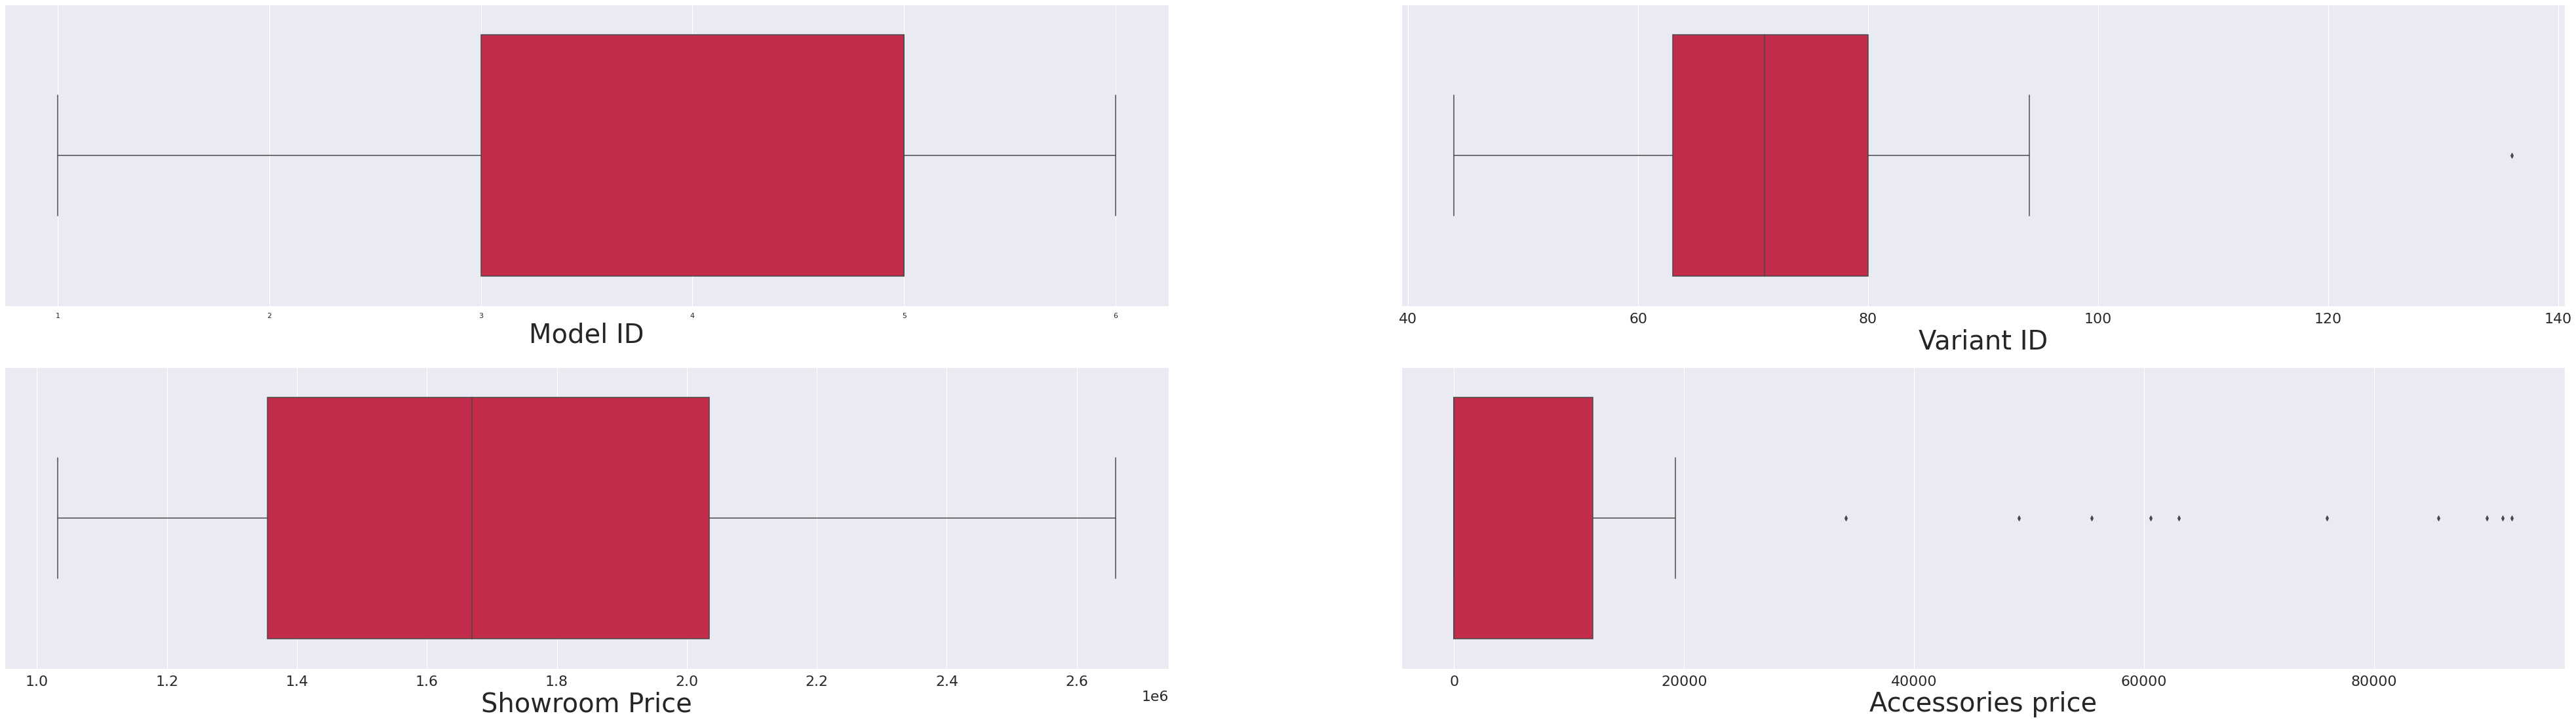

In [ ]:
# Box plot to detect outliers
lst_box = numerical_variables
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df2[i[1]],color='crimson')
    plt.xlabel(i[1],fontsize=40)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

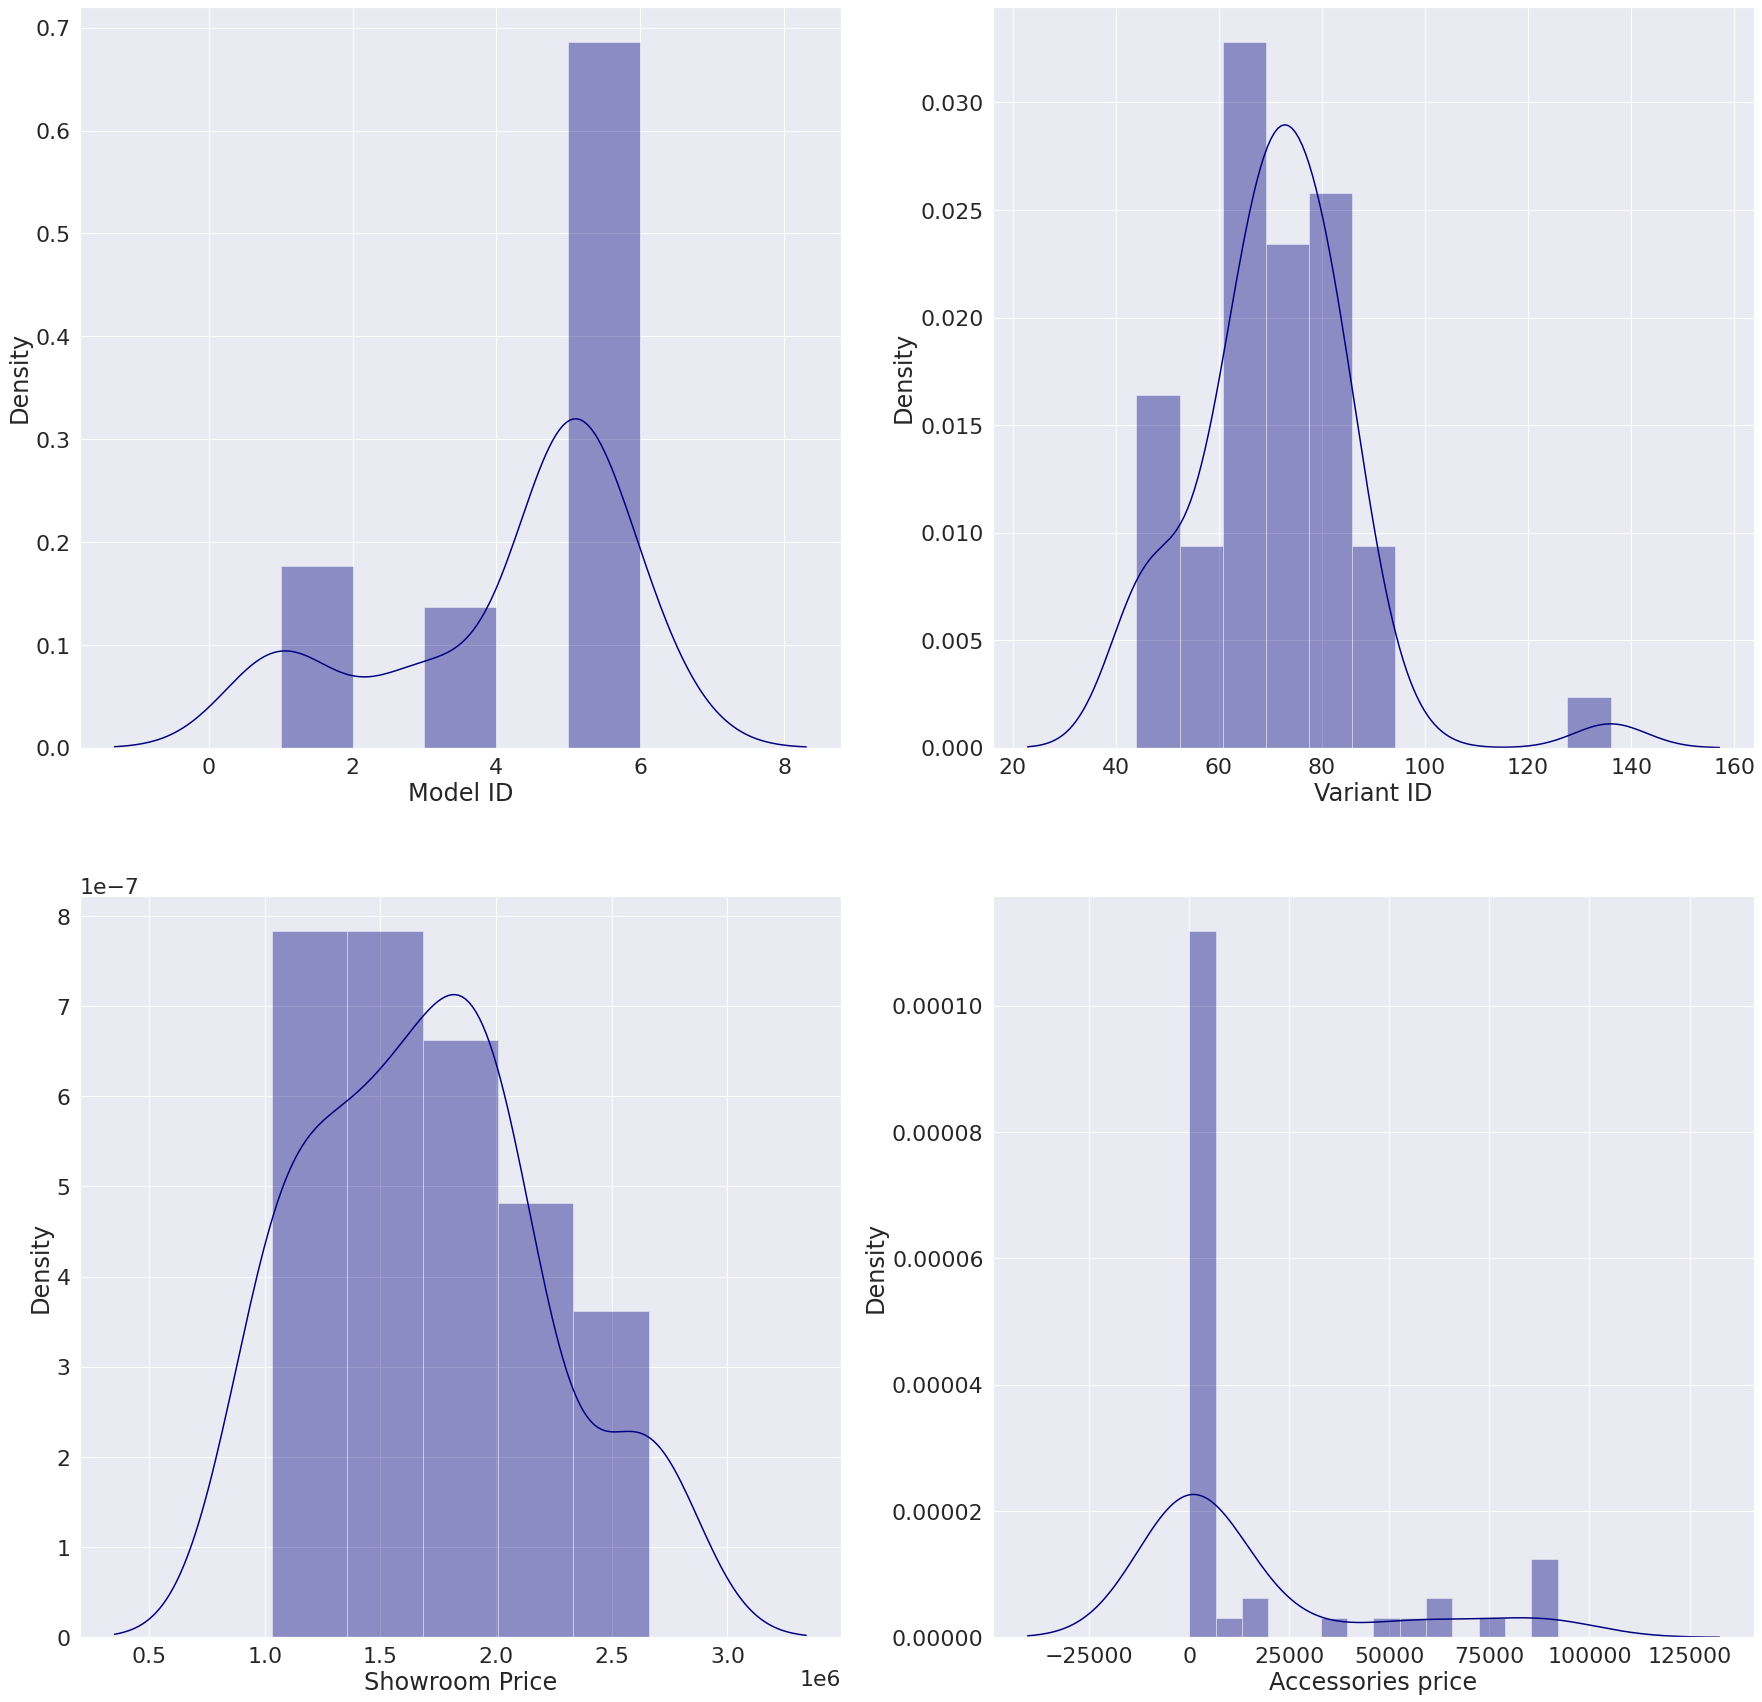

In [ ]:
# Distribution plot for numerical variables
lst_dist = numerical_variables
plt.figure(figsize = (30,30))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(2, 2,i[0]+1)
  sns.distplot(df2[i[1]],color = 'navy')

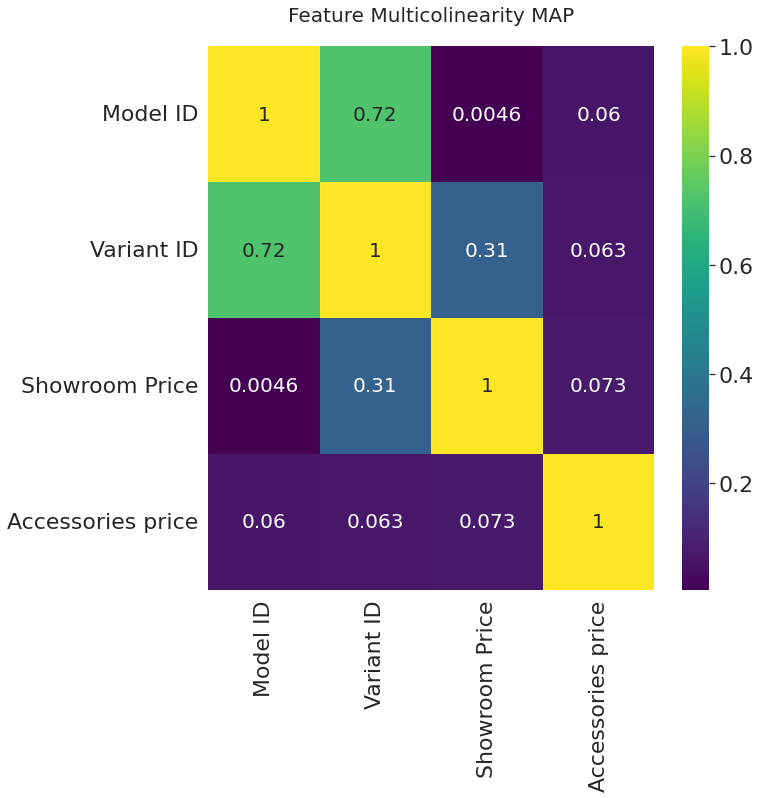

In [ ]:
# Multicolinearity
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df1.corr(),annot=True, cmap='viridis',annot_kws={"size": 20})
plt.title('Feature Multicolinearity MAP', fontsize = 20, pad=25)
plt.show()

In [ ]:
df6=df5.loc[:]

In [ ]:
df6.drop(columns=['Created At','Updated At','City','State'],inplace=True)

In [ ]:
df6

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Book Now,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price,State,duration_minutes
0,yes,no,no,yes,no,no,no,3,62,2049800,68629.0,Delhi,16
3,no,no,no,yes,no,no,no,5,85,1455800,21697.0,Delhi,23
4,no,no,no,no,no,no,no,4,93,4077800,0.0,Delhi,0
7,no,no,no,yes,no,no,no,5,67,1348000,18024.0,Delhi,0
8,no,no,no,yes,no,no,no,5,75,1822800,848.0,Delhi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13017,no,no,no,yes,no,no,no,4,87,3844800,44749.0,Delhi,0
13019,no,yes,no,yes,no,no,no,3,59,2034800,0.0,Delhi,20
13020,no,no,no,yes,no,no,no,5,75,1822800,848.0,Delhi,0
13024,no,no,no,yes,no,no,no,5,74,1669800,16963.0,Karnataka,7


In [ ]:
def convert_binary(df, columns):
    for col in columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})
    return df

In [ ]:
col=['Intro View', 'Audio Journey', 'Self Explore', 'Accessories', 'EMI',
       'Book Now', 'Test Drive']

In [ ]:
convert_binary(df6,col)

,Intro View,Audio Journey,Self Explore,Accessories,EMI,Book Now,Test Drive,Model ID,Variant ID,Showroom Price,Accessories price,duration_minutes
0,1,0,0,1,0,0,0,3,62,2049800,68629.0,16
3,0,0,0,1,0,0,0,5,85,1455800,21697.0,23
4,0,0,0,0,0,0,0,4,93,4077800,0.0,0
7,0,0,0,1,0,0,0,5,67,1348000,18024.0,0
8,0,0,0,1,0,0,0,5,75,1822800,848.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13017,0,0,0,1,0,0,0,4,87,3844800,44749.0,0
13019,0,1,0,1,0,0,0,3,59,2034800,0.0,20
13020,0,0,0,1,0,0,0,5,75,1822800,848.0,0
13024,0,0,0,1,0,0,0,5,74,1669800,16963.0,7


In [ ]:
df6['Accessories price'] = df6['Accessories price'].fillna(0)

In [ ]:
X=df6.loc[:,['Intro View', 'Audio Journey', 'Self Explore', 'Accessories', 'EMI', 'Test Drive',
             'Model ID', 'Variant ID', 'Showroom Price','Accessories price', 'duration_minutes']]
y=df6.loc[:,['Book Now']]

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# X is the feature matrix and y is the target variable
X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)

In [ ]:
X_resampled, y_resampled = RandomOverSampler(sampling_strategy='minority').fit_resample(X, y)


In [ ]:
X_resampled.shape

(12746, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit a random forest classifier to the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

# Predict the test data
y_pred = rfc.predict(X_test)

# Output the precision, recall, and f1 score
print(classification_report(y_test, y_pred))



<ipython-input-81-2d298567e4eb>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1297
           1       0.99      1.00      0.99      1253

    accuracy                           0.99      2550
   macro avg       0.99      0.99      0.99      2550
weighted avg       0.99      0.99      0.99      2550



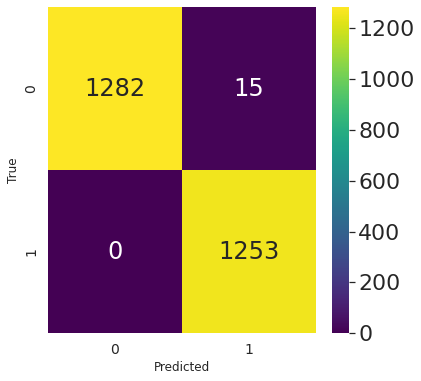

In [ ]:
# Output the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



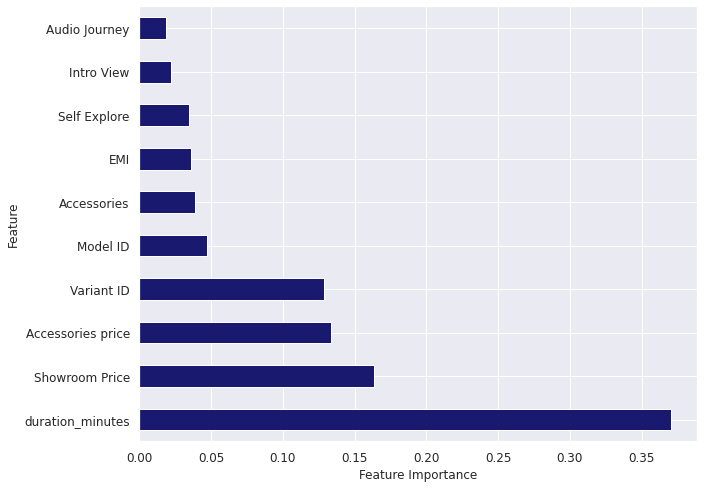

In [ ]:
# Output the feature importance
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feat_importances.nlargest(10).plot(kind='barh',color = 'midnightblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



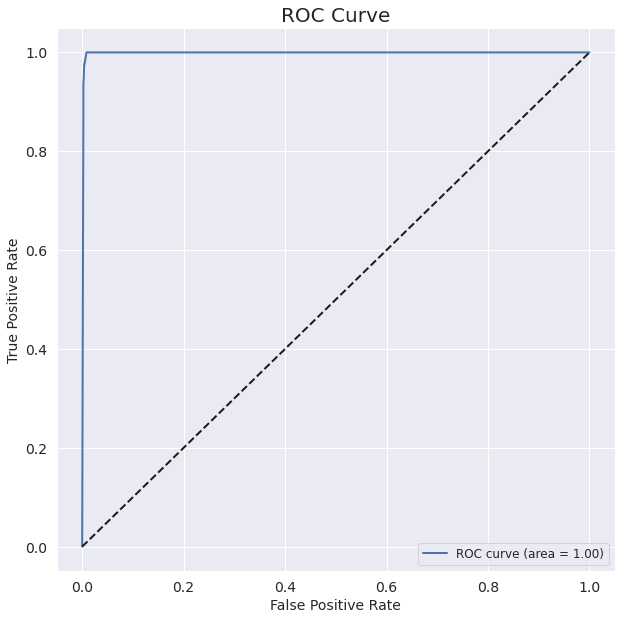

In [ ]:
# Visualize the ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()
